In [16]:
import numpy as np 
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import cv2

In [14]:
from helper import get_hsv_from_path, get_hsv_info,get_bgr_info,get_rgb_from_path

In [44]:
with open("rgb_block.pkl","rb") as f:
    rgb_block = pickle.load(f)

In [11]:
print('R')
pd.DataFrame(pd.Series(rgb_block[:,:,0].ravel()).describe()).transpose()


R


,count,mean,std,min,25%,50%,75%,max
0,2304.0,101.180556,56.134364,6.0,51.0,81.0,151.0,245.0


In [12]:
print('G')
pd.DataFrame(pd.Series(rgb_block[:,:,1].ravel()).describe()).transpose()


G


,count,mean,std,min,25%,50%,75%,max
0,2304.0,111.205295,48.719753,8.0,71.0,102.0,146.0,254.0


In [13]:
print('B')
pd.DataFrame(pd.Series(rgb_block[:,:,2].ravel()).describe()).transpose()

B


,count,mean,std,min,25%,50%,75%,max
0,2304.0,102.605903,51.598689,9.0,62.0,89.0,132.0,254.0


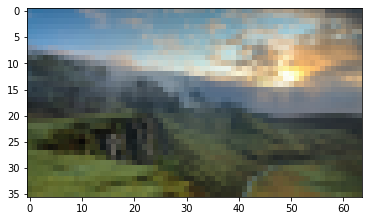

In [45]:
plt.imshow(rgb_block)

In [46]:
# upload された画像のr,g,bの平均を計算
pixel_resolution=30
imgpath = 'uploads/IMG_0616.jpg'
rgb = get_rgb_from_path(imgpath)
rgb = cv2.resize(rgb , (pixel_resolution, pixel_resolution))
r,g,b = np.mean(rgb[:,:,0]), np.mean(rgb[:,:,1]), np.mean(rgb[:,:,2])

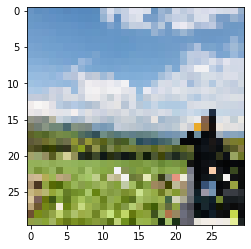

In [47]:
plt.imshow(rgb)

In [48]:
resolution = 30
mean_color = np.ones((resolution, resolution, 3)) * np.array([r,g,b],dtype=np.int)

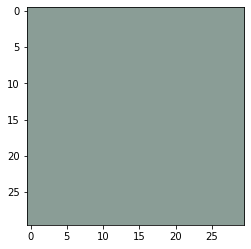

In [49]:
plt.imshow(mean_color.astype(int))

In [50]:
deltaR, deltaG, deltaB = rgb_block[:,:,0] - r, rgb_block[:,:,1] - g, rgb_block[:,:,2] - b
dist = np.sqrt(2*deltaR**2 + 4*deltaG**2 + 3*deltaB**2) # 距離の計算　blockw*blockhの二次元行列


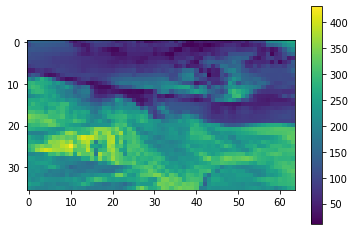

In [51]:

plt.imshow(dist)
plt.colorbar()

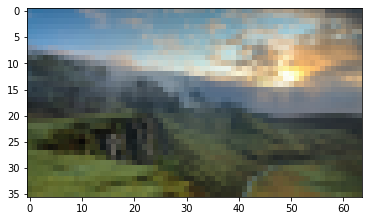

In [52]:
plt.imshow(rgb_block)

In [38]:
rgb_block[:,:,0] ,rgb_block[:,:,2] = rgb_block[:,:,2] ,rgb_block[:,:,0] 

In [42]:
rgb_block_swap = rgb_block[:,:,[2,1,0]]

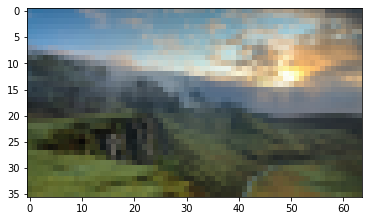

In [43]:
plt.imshow(rgb_block_swap)

In [235]:
import scipy.cluster
from collections import Counter
N_CLUSTER = 1

def kmeans_process(img, n_cluster):
    w = img.shape[1]
    h = img.shape[0]
    color_arr = img.reshape(h*w,3)
    color_arr = color_arr.astype(np.float)
    codebook, distortion = scipy.cluster.vq.kmeans(color_arr, n_cluster)  # クラスタ中心
    code, _ = scipy.cluster.vq.vq(color_arr, codebook)  # 各データがどのクラスタに属しているか
    n_data = Counter(code)
    n_data = n_data.most_common()
    colors = []
    nums = []
    for data in n_data:
        colors.append(list(map(int,codebook[data[0]])))
        nums.append(data[1])
    colors = np.array(colors)
    return colors,nums


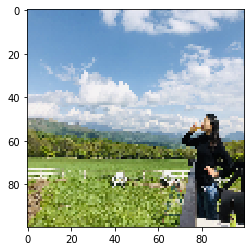

In [236]:
# upload された画像のr,g,bの平均を計算
pixel_resolution=100
imgpath = 'uploads/IMG_0616.jpg'
rgb = get_rgb_from_path(imgpath)
rgb = cv2.resize(rgb , (pixel_resolution, pixel_resolution))
plt.imshow(rgb)

In [237]:
num_cluster = 3
colors,num = kmeans_process(rgb, num_cluster)

In [238]:
colors,num

(array([[ 95, 109,  53],
        [123, 161, 192],
        [205, 213, 220]]),
 [3592, 3319, 3089])

In [239]:
num

[3592, 3319, 3089]

ValueError: input operand has more dimensions than allowed by the axis remapping

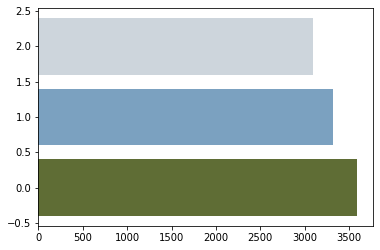

In [241]:
colorlist = colors/255
plt.barh(np.arange(0,num_cluster), num, color=colorlist, tick_label=colorlist, align="center")

In [ ]:
resolution = 30
mean_color = np.ones((resolution, resolution, 3)) * np.array([r,g,b],dtype=np.int)

In [ ]:

rgb = cv2.resize(rgb , (pixel_resolution, pixel_resolution))
r,g,b = np.mean(rgb[:,:,0]), np.mean(rgb[:,:,1]), np.mean(rgb[:,:,2])